In [16]:
!pip install torch numpy matplotlib

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# Set random seed
np.random.seed(42)
torch.manual_seed(42)


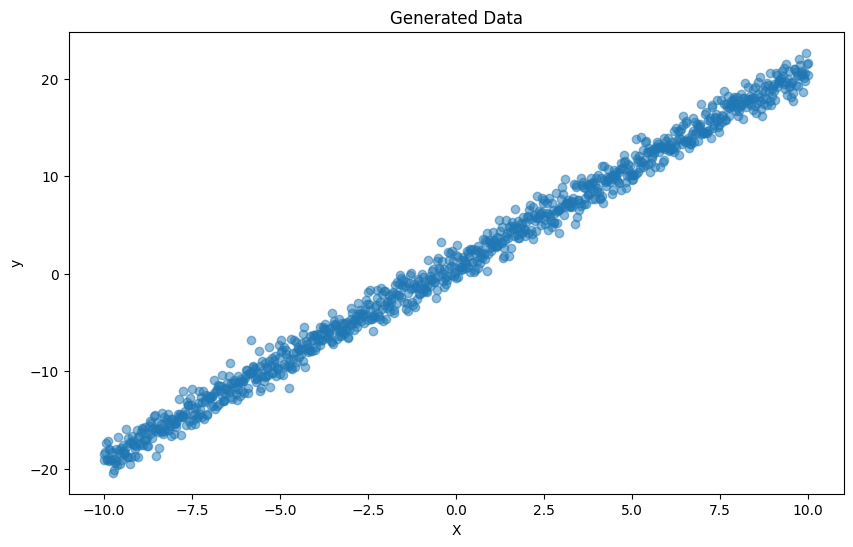

In [18]:
def generate_data(n_samples=1000):
    X = np.linspace(-10, 10, n_samples)
    y = 2 * X + 1 + np.random.normal(0, 1, n_samples)
    return X.reshape(-1, 1), y.reshape(-1, 1)

X, y = generate_data()

# Visualisasi data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5)
plt.title('Generated Data')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


In [20]:
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X)
        self.y = torch.FloatTensor(y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

In [21]:
def train_model(model, train_loader, criterion, optimizer, n_epochs):
    losses = []
    best_loss = float('inf')
    best_model_state = None

    for epoch in range(n_epochs):
        model.train()
        epoch_loss = 0

        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()

            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

            optimizer.step()
            epoch_loss += loss.item()

        avg_epoch_loss = epoch_loss / len(train_loader)
        losses.append(avg_epoch_loss)

        if avg_epoch_loss < best_loss:
            best_loss = avg_epoch_loss
            best_model_state = model.state_dict().copy()

        if epoch % 10 == 0:
            print(f'Epoch [{epoch}/{n_epochs}], Loss: {avg_epoch_loss:.4f}')

    return losses, best_model_state

In [22]:
dataset = CustomDataset(X, y)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

model = SimpleNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

n_epochs = 100
losses, best_model_state = train_model(model, train_loader, criterion, optimizer, n_epochs)

Epoch [0/100], Loss: 108.9604
Epoch [10/100], Loss: 1.0144
Epoch [20/100], Loss: 1.0522
Epoch [30/100], Loss: 1.0457
Epoch [40/100], Loss: 1.0288
Epoch [50/100], Loss: 1.0519
Epoch [60/100], Loss: 0.9978
Epoch [70/100], Loss: 1.0132
Epoch [80/100], Loss: 1.0122
Epoch [90/100], Loss: 1.0151


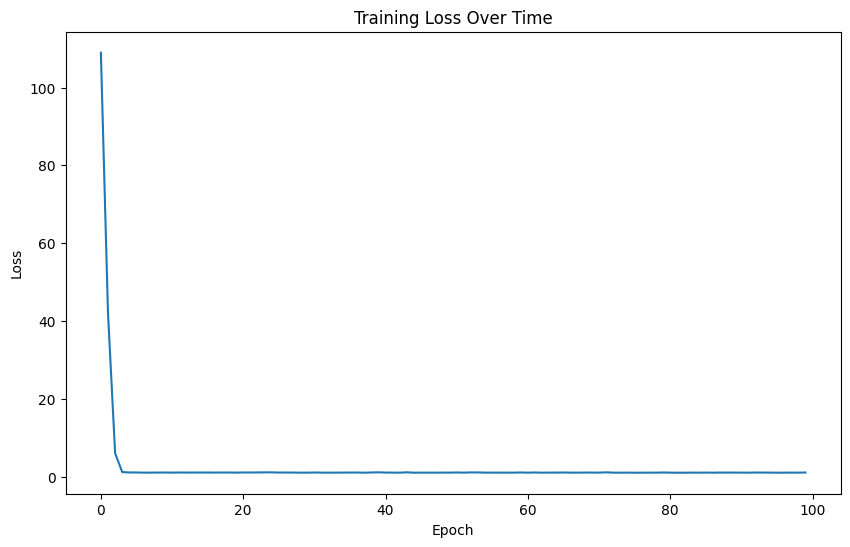

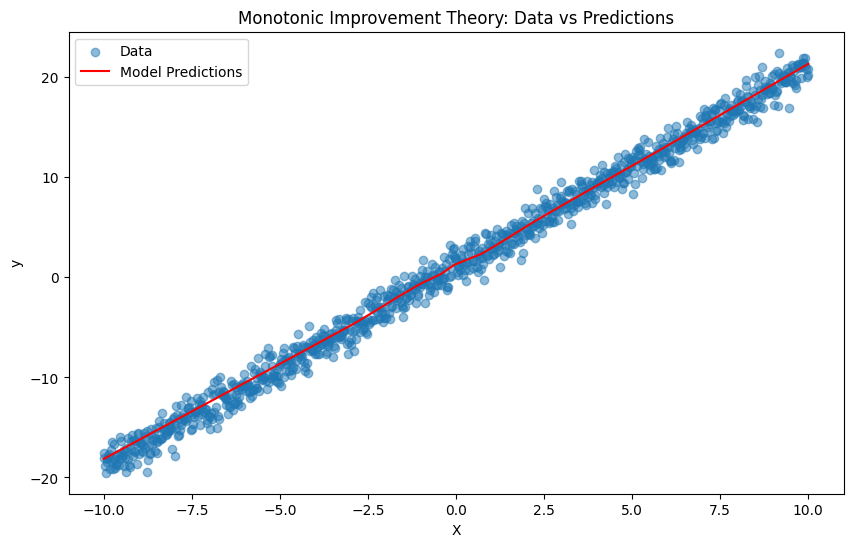

In [23]:

plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.title('Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

best_model = SimpleNet()
best_model.load_state_dict(best_model_state)
best_model.eval()

with torch.no_grad():
    X_tensor = torch.FloatTensor(X)
    predictions = best_model(X_tensor).numpy()

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Data')
plt.plot(X, predictions, color='red', label='Model Predictions')
plt.title('Monotonic Improvement Theory: Data vs Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()